#2.ダミーデータの作成


In [129]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

##【問題1】乱数の作成
平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

A=\left[
\begin{matrix} 1.0 & 0.8 \\ 0.8 & 1.0 \end{matrix}
\right]

多次元の正規分布による乱数はnp.random.multivariate_normal()を使うことで作成できます。

numpy.random.multivariate_normal — NumPy v1.16 Manual

作成したndarrayのshapeは(500, 2)になります。

《シード値について》

実行ごとに値が変わらないように、np.random.seed()により乱数のシード値を固定しておきましょう。今回シード値は0を使うことにします。

In [130]:
# 期待値と分散共分散行列の準備
mean = np.array([-3, 0])
cov = np.array([[1.0, 0.8], [0.8, 1.0]])

np.random.seed(0)

# numpy を用いた乱数の生成
data_1 = np.random.multivariate_normal(mean, cov, size=500)

# データ型の確認
print(data_1.shape)

# 期待値の確認
print(np.mean(data_1, axis=0))

# 分散共分散の確認
print(np.cov(data_1, rowvar=False))

(500, 2)
[-2.93003625  0.05405893]
[[0.94877101 0.75453518]
 [0.75453518 0.96104806]]


## 【問題2】散布図による可視化
問題1で作成したデータ点を散布図により可視化してください。


散布図はmatplotlibのplt.scatter()を使うことで描けます。


matplotlib.pyplot.scatter — Matplotlib 3.1.1 documentation



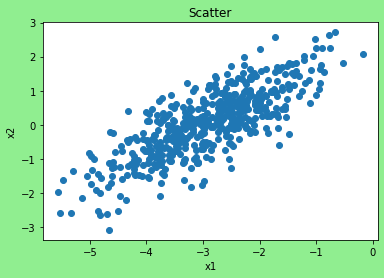

In [131]:
data_1x1 = []
data_1x2 = []

for i in range(data_1.shape[0]):
  data_1x1.append(data_1[i][0])
  data_1x2.append(data_1[i][1])

fig1 = plt.figure(facecolor="lightgreen")
scatter1 = fig1.add_subplot(1,1,1)

scatter1.scatter(data_1x1, data_1x2)
scatter1.set_title("Scatter")
scatter1.set_xlabel("x1")
scatter1.set_ylabel("x2")
fig1.show()

##【問題3】ヒストグラムによる可視化
問題1で作成したデータをヒストグラムにより可視化してください。


ヒストグラムはplt.hist()を使うことで描けます。


matplotlib.pyplot.hist — Matplotlib 3.1.1 documentation


各次元ごとに作成し、2つのヒストグラムとしてください。


それぞれのヒストグラムの横軸の範囲はplt.xlim()を用いて揃えるようにしてください。


matplotlib.pyplot.xlim — Matplotlib 3.1.1 documentation

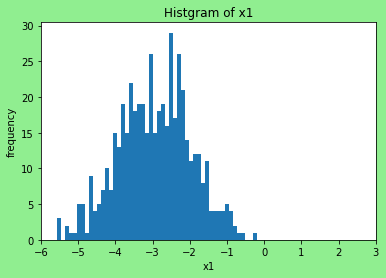

In [132]:
fig2 = plt.figure(facecolor="lightgreen")
hist1 = fig2.add_subplot(1,1,1)

hist1.hist(data_1x1, bins=50)
hist1.set_title("Histgram of x1")
hist1.set_xlabel("x1")
hist1.set_ylabel("frequency")
plt.xlim(-6, 3)
fig2.show()

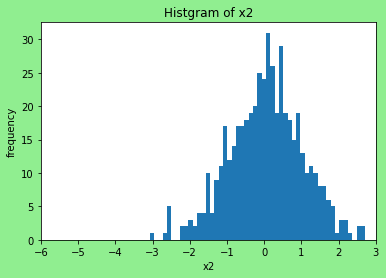

In [133]:
fig3 = plt.figure(facecolor="lightgreen")
hist2 = fig3.add_subplot(1,1,1)

hist2.hist(data_1x2, bins=50)
hist2.set_title("Histgram of x2")
hist2.set_xlabel("x2")
hist2.set_ylabel("frequency")
plt.xlim(-6, 3)
fig3.show()

##【問題4】データの追加
新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。



そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。凡例として問題1のものは0、問題2のものは1を表示してください。


《作成例》


課題のはじめに紹介した図と同じものです

In [134]:
# 期待値と分散共分散行列の準備
mean2 = np.array([0, -3])
cov2 = np.array([[1.0, 0.8], [0.8, 1.0]])

# numpy を用いた乱数の生成
data_2 = np.random.multivariate_normal(mean2, cov2, size=500)

# データ型の確認
print(data_2.shape)

# 期待値の確認
print(np.mean(data_2, axis=0))

# 分散共分散の確認
print(np.cov(data_2, rowvar=False))

(500, 2)
[-0.02245828 -3.01908023]
[[0.93647233 0.76132357]
 [0.76132357 0.95782874]]


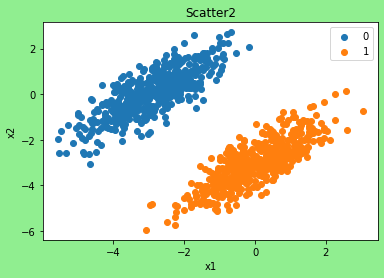

In [135]:
data_2x1 = []
data_2x2 = []

for i in range(data_2.shape[0]):
  data_2x1.append(data_2[i][0])
  data_2x2.append(data_2[i][1])

fig4 = plt.figure(facecolor="lightgreen")
scatter2 = fig4.add_subplot(1,1,1)

scatter2.scatter(data_1x1, data_1x2, label='0')
scatter2.scatter(data_2x1, data_2x2, label='1')
scatter2.legend(loc='upper right')
scatter2.set_title("Scatter2")
scatter2.set_xlabel("x1")
scatter2.set_ylabel("x2")
fig4.show()

##【問題5】データの結合
データはまとめておいた方が後々扱いやすいです。問題1、4で作成したndarrayを 結合 し、(1000, 2)のndarrayとしてください。結合はnp.concatenate()やnp.vstack()を使うことで行えます。


numpy.concatenate — NumPy v1.16 Manual


numpy.vsplit — NumPy v1.16 Manual



In [136]:
data_x_all = np.concatenate((data_1, data_2), axis=0)
print(data_x_all.shape)

(1000, 2)


In [137]:
data_x_all2 = np.vstack((data_1, data_2))
print(data_x_all2.shape)

(1000, 2)


## 【問題6】ラベル付け
ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示す ラベル 付けを行ってください。問題1のものには0、問題4のものには1を対応させます。


0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。


機械学習に使用するデータセットはこのような形になっていることが多いです。

In [138]:
index = [0]*data_1.shape[0] + [1]*data_2.shape[0]
index_ndarray = np.array(index).reshape(data_1.shape[0] + data_2.shape[0], 1)

data_all = np.append(data_x_all, index_ndarray, axis=1)
print(data_all.shape)
print(data_all)

(1000, 3)
[[-4.80006782 -1.54698618  0.        ]
 [-4.63714503 -0.21987973  0.        ]
 [-4.46267867 -2.08076347  0.        ]
 ...
 [-0.2185878  -3.15676476  1.        ]
 [-1.37970304 -4.27950068  1.        ]
 [ 1.49786804 -2.33126243  1.        ]]
